In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import zipfile
zf = zipfile.ZipFile('archive.zip')
zf.extractall()
zf.close()

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [5]:
train_data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [6]:
X_train = train_data['x'][:-1]
y_train = train_data['y'][:-1]
X_test = train_data['x'][:-1]
y_test = train_data['y'][:-1]

In [7]:
import random
import numpy as np

In [12]:
class LinearRegressorL1:
  def __init__(self):
    # weight and bias
    self.w = np.random.rand(1) * 0.1
    self.b = np.random.rand(1) * 0.1

  def cost(self, y_pred):
    value = np.sum(np.square(self.y - y_pred)) + self.l1 * np.sum(abs(self.w))  
    cost = (value) / self.n
    return(cost)

  def MSE(self, y_pred, y):
    errors = y - y_pred # error is the difference between actual and predicted value
    mse = float(np.sum(np.square(errors)) / self.n) #mean of sum of square of erros
    return mse ** 0.5

  def fit(self, X_data, y_data, l1, learning_rate = 0.0001, iterations = 100):
    self.X = X_data
    self.y = y_data
    self.l = learning_rate # learning rate
    self.iterations = iterations # no of iteration
    self.n = float(len(self.X)) # size of data  
    self.l1 = l1 # lambda for lasso regression
    self.history = np.zeros(self.iterations)
    # finding optimal value for w and b
    for i in range(self.iterations):
      y_pred = self.w * self.X + self.b
      error = y_pred - self.y # error is the difference between actual and predicted value
      # calculating Gradient Descent
      gw = (2 * np.sum(error * self.X)/self.n) + abs(self.l1)
      gb = 2 * np.sum(error)/ self.n 
      self.w = self.w - self.l * gw
      self.b = self.b - self.l * gb
      # cost is calculated for every iteration
      self.history[i] = self.cost(y_pred)
    self.rmse = self.MSE(y_pred, self.y)
    print(self.rmse)


  def results(self):
    print(self.w,self.b)
    fig=plt.figure(figsize=(14,14))
    a1=fig.add_subplot(211)
    plt.title('minimisation of errors across the iterations')
    plt.plot(self.history)
    #making predictions
    a2 = fig.add_subplot(212)
    final_y = self.w * self.X +self.b 
    plt.scatter(self.X,self.y)
    plt.title('regrssion line')
    plt.plot(self.X,final_y,color='red') #plotting the red line 
    plt.show()  
    print ('Root Mean Squared Error=',self.rmse)

2.8073800037619763
[0.99813551] [0.06628662]


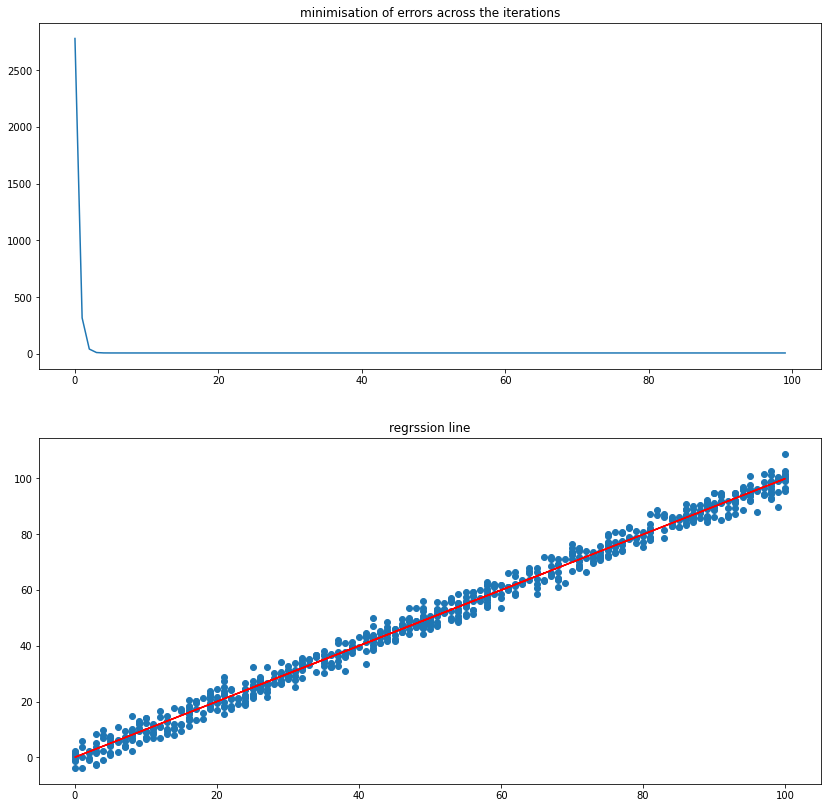

Root Mean Squared Error= 2.8073800037619763


In [17]:
l = LinearRegressorL1()
l.fit(X_train, y_train, l1= 0.001)
l.results()